## 250810 Convergence

In [7]:
import pandas as pd
from sequenzo import *

In [8]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建后缀树
# ------------------------

india_tree = build_suffix_tree(india_sequences)
us_tree = build_suffix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualConvergence(india_sequences)
us_model = IndividualConvergence(us_sequences)

In [9]:
india_suffix_counts = compute_suffix_count(india_tree, T)
india_merging_factors = compute_merging_factor(india_tree, T)
india_js_scores = compute_js_convergence(india_sequences, state_set=india_states)

us_suffix_counts = compute_suffix_count(us_tree, T)
us_merging_factors = compute_merging_factor(us_tree, T)
us_js_scores = compute_js_convergence(us_sequences, state_set=us_states)

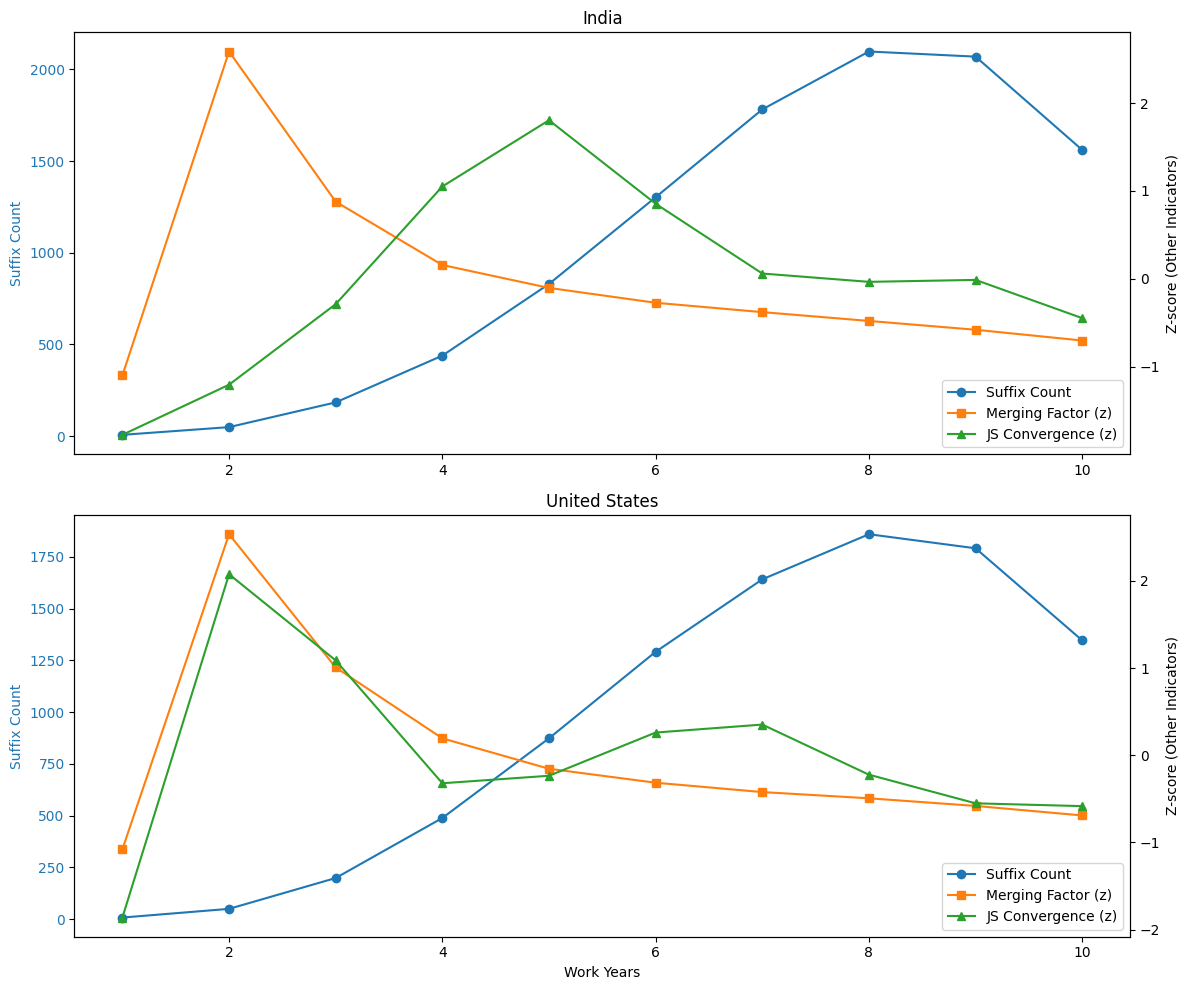

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [10]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "suffix_counts": india_suffix_counts,
        "merging_factors": india_merging_factors,
        "js_convergence": india_js_scores
    },
    "USA": {
        "suffix_counts": us_suffix_counts,
        "merging_factors": us_merging_factors,
        "js_convergence": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="suffix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


In [11]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["converged"] = india_model.compute_converged()
india_df["first_convergence_year"] = india_model.compute_first_convergence_year()
india_df["suffix_rarity_score"] = india_model.compute_suffix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["converged"] = us_model.compute_converged()
us_df["first_convergence_year"] = us_model.compute_first_convergence_year()
us_df["suffix_rarity_score"] = us_model.compute_suffix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

计算每年 suffix rarity

如果某些年几乎所有人相同（方差接近 0），z 分数会是 NaN；这种情况下原始尺度的 rarity 更稳健。


In [13]:
# 返回 DataFrame，列名 t1..t10；zscore=True 则按年做列内标准化
df_rarity_india = india_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
df_rarity_us = us_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# 若需要 z 分数版本：
# df_rarity_z = div.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=True)

df_rarity_india

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
1,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
2,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
3,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
4,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
...,...,...,...,...,...,...,...,...,...,...
15108,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
15109,9.623309,9.623309,9.623309,4.922830,4.887112,4.861137,2.057000,1.986558,1.887440,1.812552
15110,0.915332,0.898778,0.878663,0.845755,0.814941,0.781862,0.751244,0.726312,0.696395,0.662843
15111,2.559407,2.527417,2.460138,2.363491,2.243678,2.148538,2.057000,1.986558,1.887440,1.812552


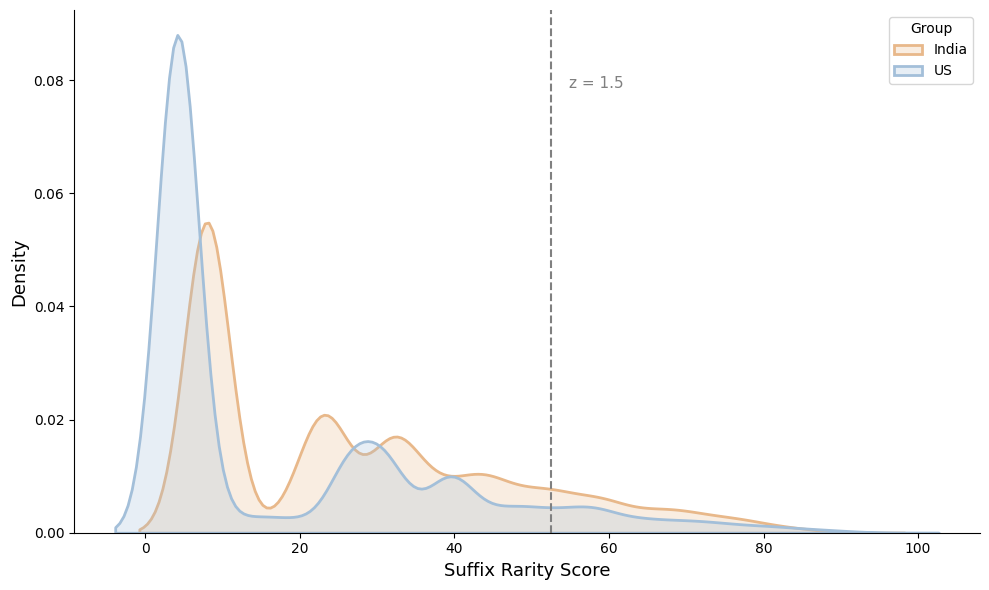

📊 统计信息: {'mean': 21.692416720586753, 'std': 20.562873606961777, 'threshold_value': 52.53672713102942, 'z_threshold': 1.5}


In [14]:
# 🎉 使用新的通用可视化函数！
# 演示 plot_prefix_rarity_distribution 的各种用法

# 示例1：多组对比，带阈值线（你现在正在使用的效果）
data_dict = {
    "India": india_df["suffix_rarity_score"].tolist(),
    "US": us_df["suffix_rarity_score"].tolist()
}

stats = plot_suffix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=True,
    z_threshold=1.5,
    save_as="suffix_rarity_distribution_with_threshold"
)

print("📊 统计信息:", stats)
